### Create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def hist_calcs(s1, s1_name, s2, s2_name):
    plt.hist(s1, alpha=0.5, label=s1_name, bins=np.arange(s1.min()-.5,s1.max()+1)) 
    plt.hist(s2, alpha=0.5, label=s2_name,  bins=np.arange(s2.min()-.5,s2.max()+1)) 
    plt.legend(loc='upper right') 
    plt.show()
    
    print('{} mean: {}'.format(s1_name, s1.mean()))
    print('{} mean: {}'.format(s2_name, s2.mean()))
    print('{} standard deviation: {}'.format(s1_name, s1.std()))
    print('{} standard deviation: {}'.format(s2_name, s2.std()))

In [3]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

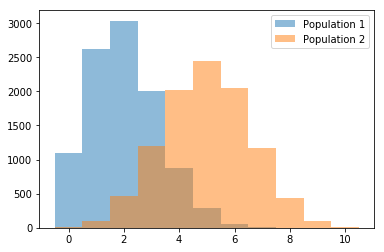

Population 1 mean: 2.0112
Population 2 mean: 4.9896
Population 1 standard deviation: 1.2838514555819922
Population 2 standard deviation: 1.5928878931048476


In [4]:
hist_calcs(pop1, 'Population 1', pop2, 'Population 2')

In [5]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

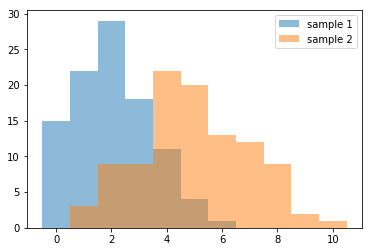

sample 1 mean: 2.04
sample 2 mean: 4.98
sample 1 standard deviation: 1.399428454762872
sample 2 standard deviation: 1.9645864704817653


In [6]:
hist_calcs(sample1,'sample 1', sample2, 'sample 2')

### For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. 

1. **Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?**

When the sample sizes are increased from 100 to 1000, the sample means and sample standard deviations will likely move closer to the population means and population standard deviations. When the sample size is decreased we would likely see the opposite.

In [7]:
inc_sample1 = np.random.choice(pop1, 1000, replace=True)
inc_sample2 = np.random.choice(pop2, 1000, replace=True)

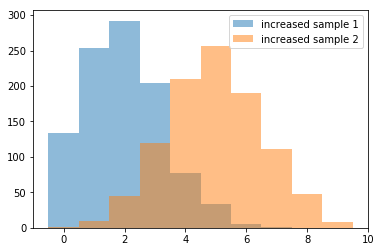

increased sample 1 mean: 1.96
increased sample 2 mean: 4.958
increased sample 1 standard deviation: 1.3047605144240073
increased sample 2 standard deviation: 1.572334569994567


In [8]:
hist_calcs(inc_sample1,'increased sample 1', inc_sample2, 'increased sample 2')

In [9]:
dec_sample1 = np.random.choice(pop1, 20, replace=True)
dec_sample2 = np.random.choice(pop2, 20, replace=True)

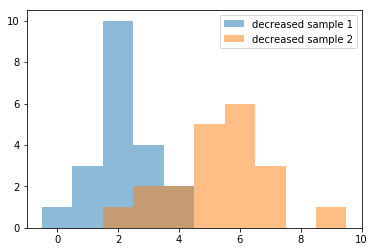

decreased sample 1 mean: 2.15
decreased sample 2 mean: 5.35
decreased sample 1 standard deviation: 0.9630680142129111
decreased sample 2 standard deviation: 1.5898113095584647


In [10]:
hist_calcs(dec_sample1,'decreased sample 1', dec_sample2, 'decreased sample 2')

2. **Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?**

In [11]:
from scipy.stats import ttest_ind

In [36]:
pop1_c = np.random.binomial(10, 0.3, 10000) #population 1 changed
sample1_c = np.random.choice(pop1_c, 100, replace=True)
sample2_c = np.random.choice(pop2, 100, replace=True)

In [37]:
ttest_ind(sample2_c, sample1_c, equal_var=False)

Ttest_indResult(statistic=7.5690038090044158, pvalue=1.4703614465012116e-12)

In [30]:
pop1_c2 = np.random.binomial(10, 0.4, 10000) # population 1 changed for second time
sample1_c2 = np.random.choice(pop1_c2, 100, replace=True)
sample2_c2 = np.random.choice(pop2, 100, replace=True)

In [31]:
ttest_ind(sample2_c2, sample1_c2, equal_var=False)

Ttest_indResult(statistic=2.7438188315644791, pvalue=0.0066439407472094793)

As pop1's probability value approaches pop2's probability value, the samples taken from each are more likely to have lower t-statistics and higher p values when tested against each other. 

This makes sense because populations with probability values (or means) that are far apart will have less overlap in their data, so a given sample size should be able to prove differences between the populations with a greater degree of certainty than if those populations had probability values (or means) that were close to one another. 


(array([   11.,   100.,   461.,  1203.,  2015.,  2440.,  2056.,  1163.,
          439.,   104.,     8.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5]),
 <a list of 11 Patch objects>)

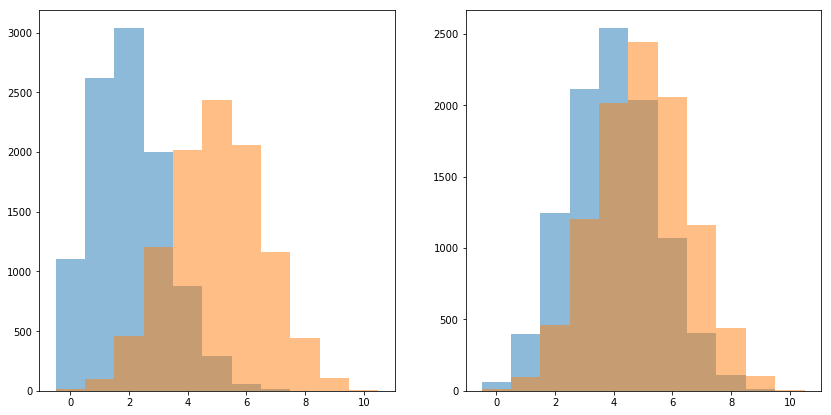

In [43]:
plt.figure(figsize=(14, 7))

plt.subplot(1,2,1)
plt.hist(pop1, alpha=0.5, bins=np.arange(pop1.min()-.5,pop1.max()+1)) 
plt.hist(pop2, alpha=0.5,  bins=np.arange(pop2.min()-.5,pop2.max()+1)) 

plt.subplot(1,2,2)
plt.hist(pop1_c2, alpha=0.5, bins=np.arange(pop1_c2.min()-.5,pop1_c2.max()+1)) 
plt.hist(pop2, alpha=0.5,  bins=np.arange(pop2.min()-.5,pop2.max()+1)) 

3. **Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?**

In [44]:
ps_pop1 = np.random.poisson(1,10000)
ps_pop2 = np.random.poisson(2,10000)

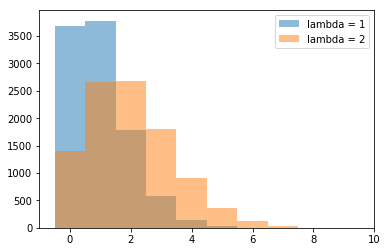

lambda = 1 mean: 0.9864
lambda = 2 mean: 1.9933
lambda = 1 standard deviation: 0.9901590983271324
lambda = 2 standard deviation: 1.4129596986467805


In [45]:
hist_calcs(ps_pop1, 'lambda = 1', ps_pop2, 'lambda = 2')

In [53]:
ps_sample1 = np.random.choice(ps_pop1, 100)
ps_sample2 = np.random.choice(ps_pop2, 100)

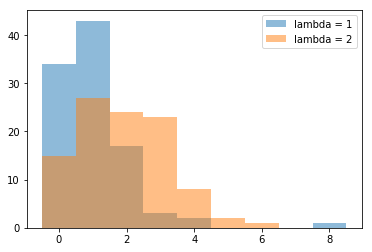

lambda = 1 mean: 1.02
lambda = 2 mean: 1.92
lambda = 1 standard deviation: 1.1400000000000001
lambda = 2 standard deviation: 1.3242356285797476


In [54]:
hist_calcs(ps_sample1, 'lambda = 1', ps_sample2, 'lambda = 2')

Yes the sample means still seam to be a good reflection of the population means. This is consistent with the Central Limit Theorem